# Image Processing

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, io

In [3]:
# If necessary, uncomment one of both command and execute.
#!conda install scikit-image
#!pip install scikit-image

In [4]:
def load_image(filename):
    '''Read and transform to grayscale image.'''
    X = io.imread(filename)
    return color.rgb2gray(X)

def imshow(X, figsize=(4, 4)):
    '''
    Plot image represented by 2D array X. 
    '''
    plt.figure(figsize=figsize)
    plt.imshow(X, cmap='gray')
    plt.xticks(())
    plt.yticks(())
    plt.show()



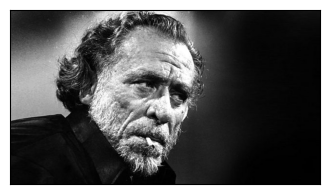

In [5]:
X = load_image('./data/cb_face.jpeg')
imshow(X)

---
### Exercise 1

Show 
+ image size
+ maximum pixel value
+ minimum pixel value 


In [6]:
# code

---
### Exercise 2

Write a function that returns a noisy copy of an image by adding Gaussian distributed noise. Test the functions with different standard deviations and display the resulting images.

In [7]:
# code

---
### Exercise 3

Write a function that crops a region of interest of an image. Test the function by trying to crop the face of the person and display the result.  

In [9]:
# code

---
### Exercise 4
Write a function that flips an image horizontally. Test your function and display the resulting image. 

In [10]:
# code

---
### Exercise 5

Write a function that blends two images together using a weighted sum. The weights of both images should be non-negative and add to one. Test the function by blending the original image and the horizontally flipped images for different weights and display the resulting images.

In [11]:
# code

---
### Exercise 6

Write a function that returns a binary image by applying thresholding. Set pixels to white and black based on a certain threshold value. Test your function for different threshold values and display the resulting images.

In [12]:
# code